# Purpose


This notebook demonstrates the data pipeline from raw tables to analytical datasets. At the end of this activity, train & test data sets are created from raw data.



## Imports

In [1]:
from pprint import pprint
import os
import os.path as op
import shutil

# standard third party imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.options.mode.use_inf_as_na = True


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import warnings

warnings.filterwarnings('ignore', message="The default value of regex will change from True to False in a future version.", 
                        category=FutureWarning)

/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/datashader/bundling.py:42: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def resample_segment(segments, new_segments, min_segment_length, max_segment_length, ndims):
/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/datashader/bundling.py:75: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplie

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
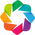

/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit 

In [4]:
from ta_lib.core.api import (
    create_context, get_dataframe, get_feature_names_from_column_transformer, get_package_path,
    display_as_tabs, string_cleaning, merge_info, initialize_environment,
    list_datasets, load_dataset, save_dataset
)

import ta_lib.eda.api as eda

In [5]:
initialize_environment(debug=False, hide_warnings=True)

## Utility functions

# 1. Initialization

In [6]:
config_path = op.join('conf', 'config.yml')
context = create_context(config_path)
pprint(list_datasets(context))

housing_df = load_dataset(context, '/raw/housing')

['/raw/housing',
 '/cleaned/housing',
 '/processed/housing',
 '/train/housing/features',
 '/train/housing/target',
 '/test/housing/features',
 '/test/housing/target',
 '/score/housing/output']


# 2. Data cleaning and consolidation

**<u>NOTES</u>**

The focus here is to create a cleaned dataset that is appropriate for solving the DS problem at hand from the raw data.

**1. Do**
* clean dataframe column names
* ensure dtypes are set properly
* join with other tables etc to create features
* transform, if appropriate, datetime like columns to generate additional features (weekday etc)
* transform, if appropriate, string columns to generate additional features
* discard cols that are not useful for training the model (IDs, constant cols, duplicate cols etc)
* additional features generated from existing columns


**2. Don't**
* handle missing values or outliers here. mark them and leave them for processing downstream.


## 2.1 Clean individual tables 

### Products Table

From data discovery, we know the following

* all columns are strings : nothing to fix. Apply generic cleaning (strip extra whitespace etc)
* ensure all `invalid` string entries are mapped to np.NaN
* some column are duplicates (eg. color, Ext_Color). Better to `coalesce` them instead of an outright discard of one of the columns.
* SKU is key column : ensure no duplicate values
* This will go into production code


In [7]:
housing_df_clean = (
    housing_df
    # while iterating on testing, it's good to copy the dataset(or a subset)
    # as the following steps will mutate the input dataframe. The copy should be
    # removed in the production code to avoid introducing perf. bottlenecks.
    .copy()

    # set dtypes : nothing to do here
    .passthrough()
    
    .replace({'': np.NaN})
    
    # ensure that the key column does not have duplicate records
    .remove_duplicate_rows(col_names=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity'], keep_first=True)
    
    # clean column names (comment out this line while cleaning data above)
    .clean_names(case_type='snake')
)
housing_df_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### NOTE

It's always a good idea to save cleaned tabular data using a storage format that supports the following 

1. preserves the type information
2. language agnostic storage format
3. Supports compression
4. Supports customizing storage to optimize different data access patterns

For larger datasets, the last two points become crucial.

`Parquet` is one such file format that is very popular for storing tabular data. It has some nice properties:
- Similar to pickles & RDS datasets, but compatible with all languages
- Preserves the datatypes
- Compresses the data and reduces the filesize
- Good library support in Python and other languages
- As a columnar storage we can efficiently read fewer columns
- It also supports chunking data by groups of columns (for instance, by dates or a particular value of a key column) that makes loading subsets of the data fast.

In [8]:
save_dataset(context, housing_df_clean, 'cleaned/housing')

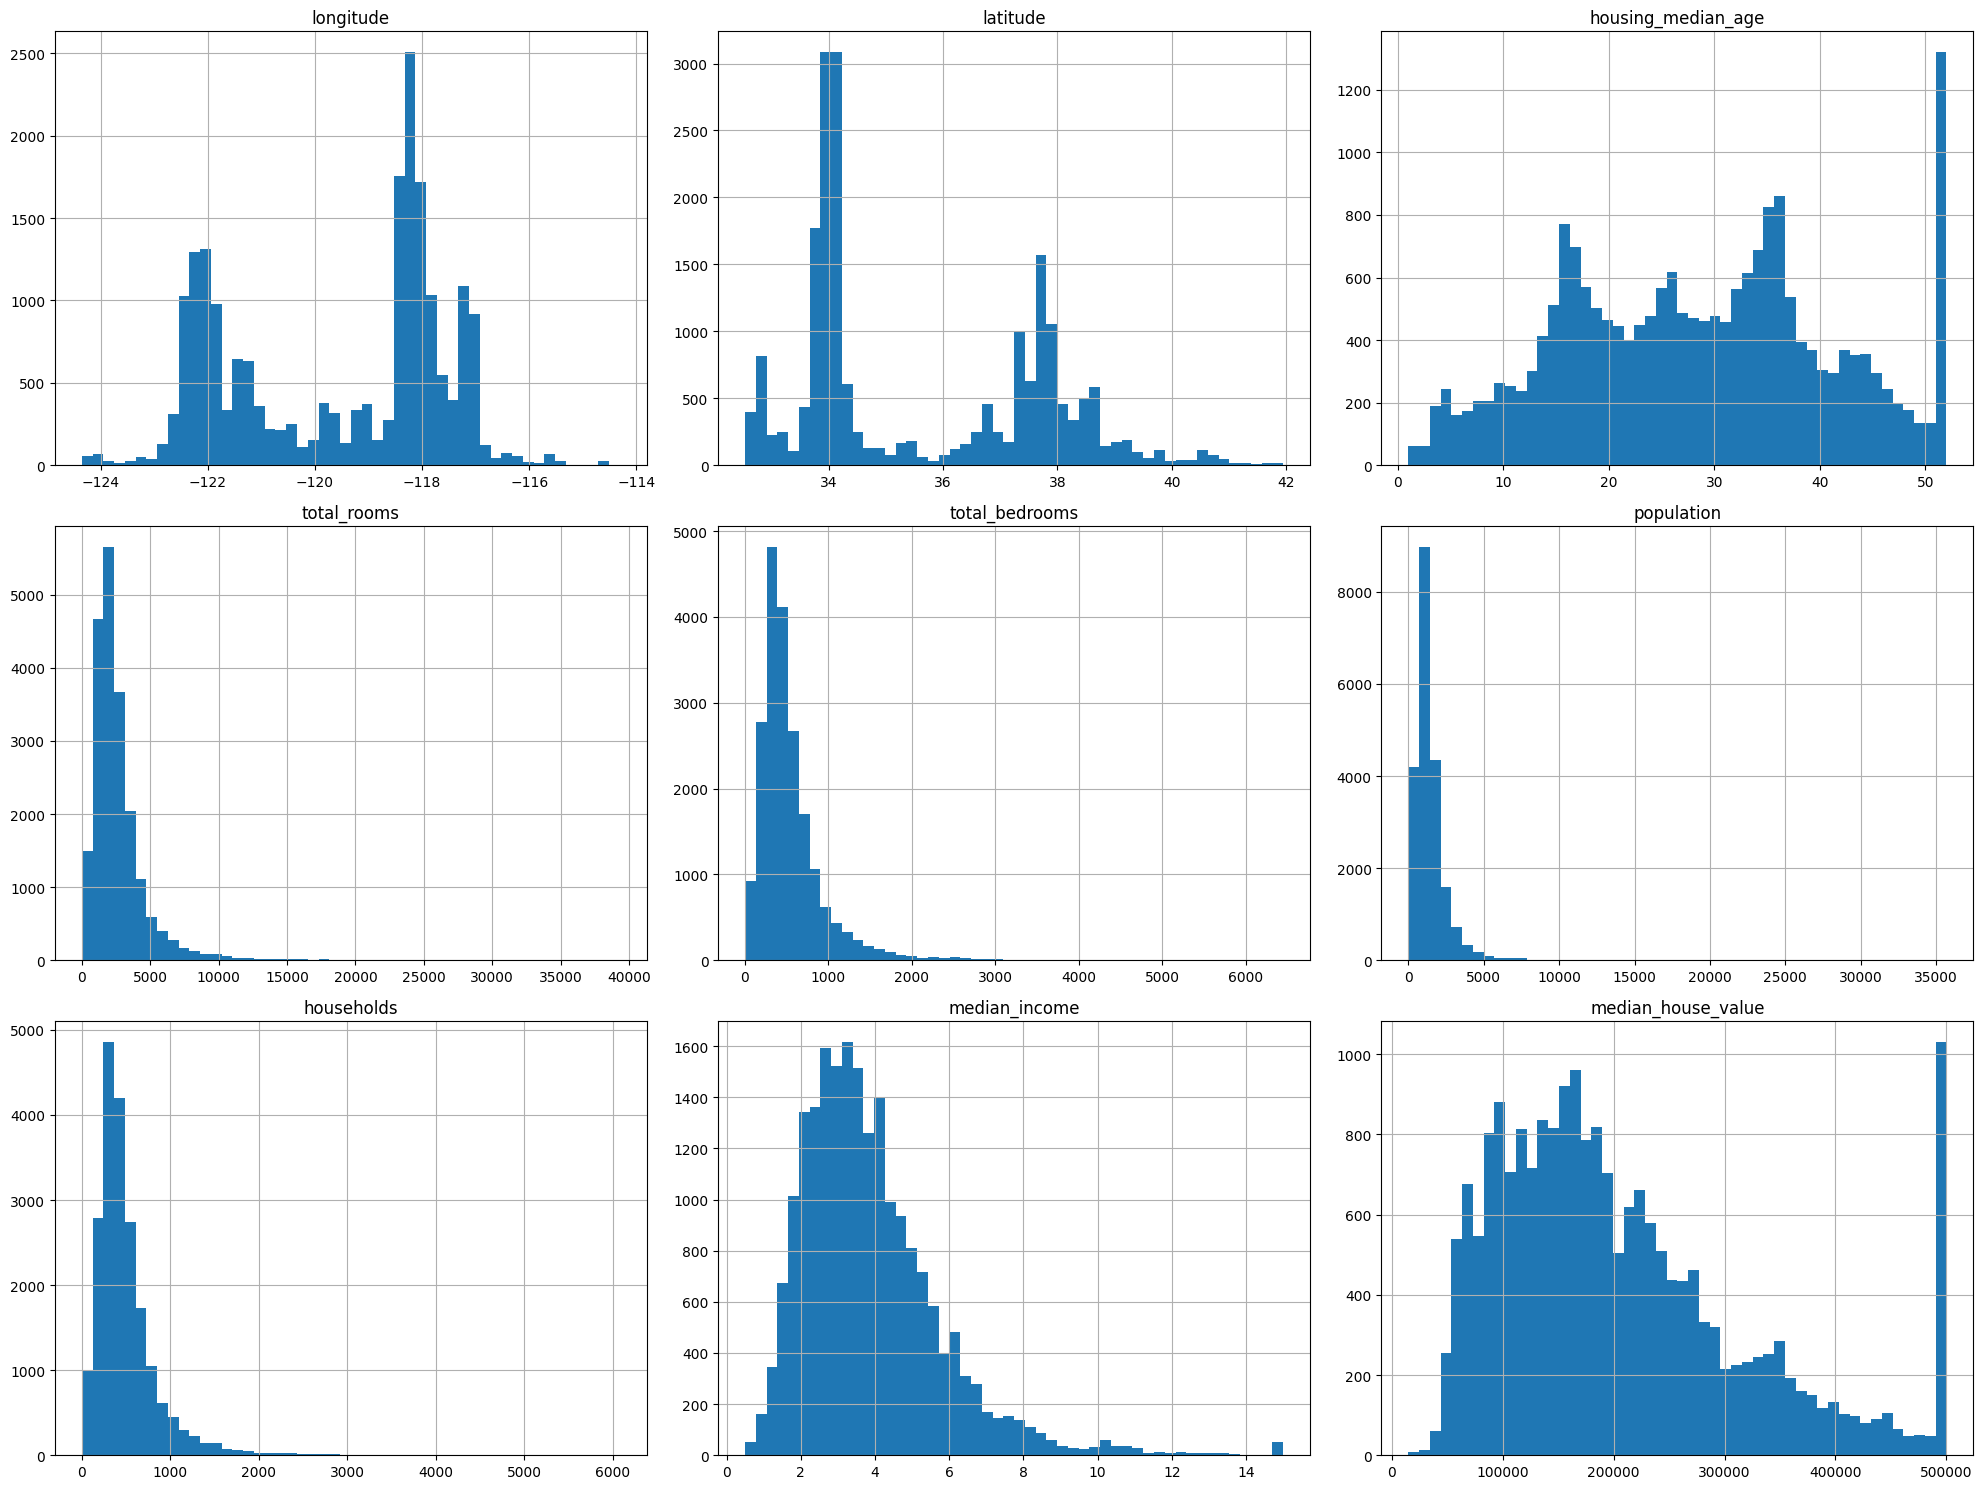

In [9]:
%matplotlib inline   
import matplotlib.pyplot as plt
housing_df_clean.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

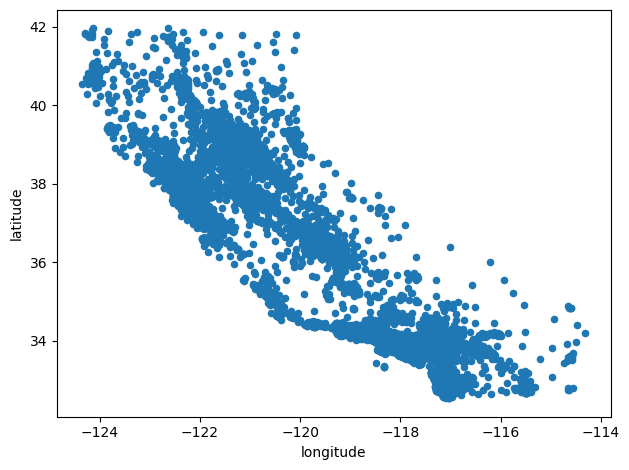

In [10]:
housing_df_clean.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

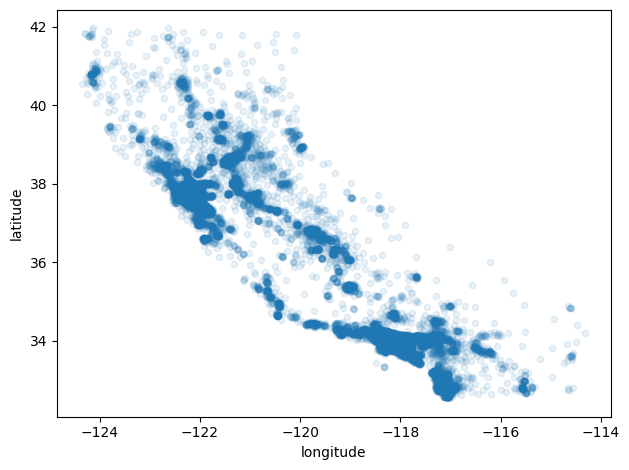

In [11]:
housing_df_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

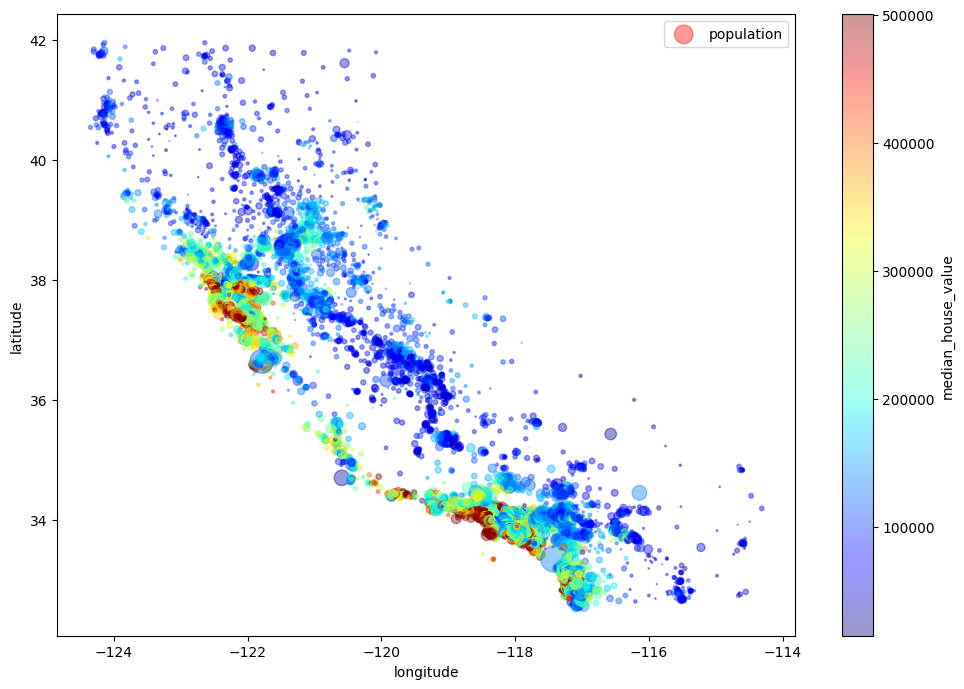

In [12]:
housing_df_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing_df_clean["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [13]:
corr_matrix = housing_df_clean.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

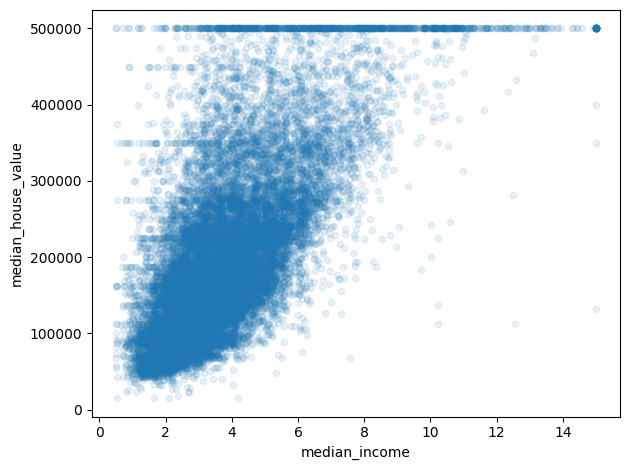

In [14]:
housing_df_clean.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)

In [15]:
# Any verifications on the data
from ta_lib.eda.api import get_variable_summary
display_as_tabs([
    ("Summary", f"Length: {len(housing_df_clean)}, Columns: {len(housing_df_clean.columns)}"),
    ("Variable summary", get_variable_summary(housing_df_clean)),
    ("head", housing_df_clean.head(5).T),
    ("tail", housing_df_clean.tail(5).T),
])

BokehModel(combine_events=True, render_bundle={'docs_json': {'6398211a-7f5f-4e5a-a2eb-55d348b329c9': {'version…

# 3. Generate Train, Validation and Test datasets



- We split the data into train, test (optionally, also a validation dataset)
- In this example, we are binning the target into 10 quantiles and then use a Stratified Shuffle to split the data.
- See sklearn documentation on the various available splitters
- https://scikit-learn.org/stable/modules/classes.html#splitter-classes
- This will go into production code (training only)

<AxesSubplot:>

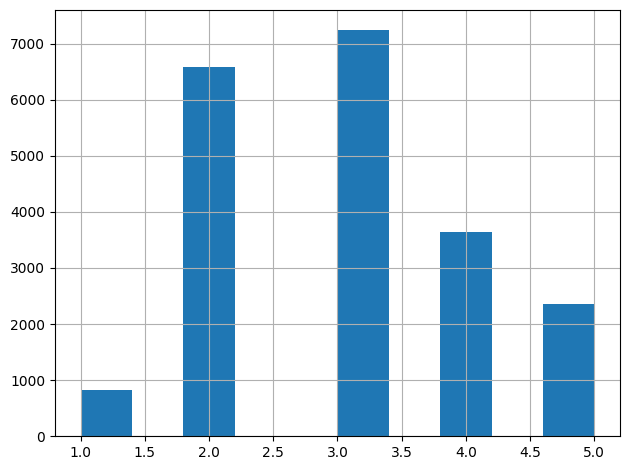

In [16]:
import numpy as np
housing_df_clean["income_cat"] = pd.cut(housing_df_clean["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing_df_clean["income_cat"].hist()

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
from ta_lib.core.api import custom_train_test_split  # helper function to customize splitting
from scripts import *

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=context.random_seed)
housing_df_train, housing_df_test = custom_train_test_split(housing_df_clean, splitter, by="income_cat")

In [18]:
housing_df_test["income_cat"].value_counts() / len(housing_df_test)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [19]:
housing_df_train["income_cat"].value_counts() / len(housing_df_train)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [20]:
for set_ in (housing_df_train, housing_df_test):
    set_.drop("income_cat", axis=1, inplace=True)

In [21]:
target_col = "median_house_value"

train_X, train_y = (
    housing_df_train
    
    # split the dataset to train and test
    .get_features_targets(target_column_names=target_col)
)
save_dataset(context, train_X, 'train/housing/features')
save_dataset(context, train_y, 'train/housing/target')


test_X, test_y = (
    housing_df_test
    
    # split the dataset to train and test
    .get_features_targets(target_column_names=target_col)
)
save_dataset(context, test_X, 'test/housing/features')
save_dataset(context, test_y, 'test/housing/target')